<a href="https://colab.research.google.com/github/devajithsb/Automatic-Speech-Recognition---DNN/blob/main/DNN_working_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install SpeechRecognition

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 68.2 MB/s eta 0:00:00


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2500 - loss: 33.4313 - val_accuracy: 0.0000e+00 - val_loss: 10.5520
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5000 - loss: 3.1827 - val_accuracy: 0.0000e+00 - val_loss: 7.9053
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.2500 - loss: 23.0710 - val_accuracy: 0.5000 - val_loss: 2.2292
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.2500 - loss: 20.3049 - val_accuracy: 0.5000 - val_loss: 6.7567
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7500 - loss: 10.4368 - val_accuracy: 0.0000e+00 - val_loss: 13.6835
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.2500 - loss: 9.1949 - val_accuracy: 0.0000e+00 - val_loss: 20.0934
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.0000e+00 - loss: 20.2881 - val_accuracy: 0.0000e+00 - val_loss: 24.8179
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.2500 - loss: 27.4619 - val_accuracy: 0.00

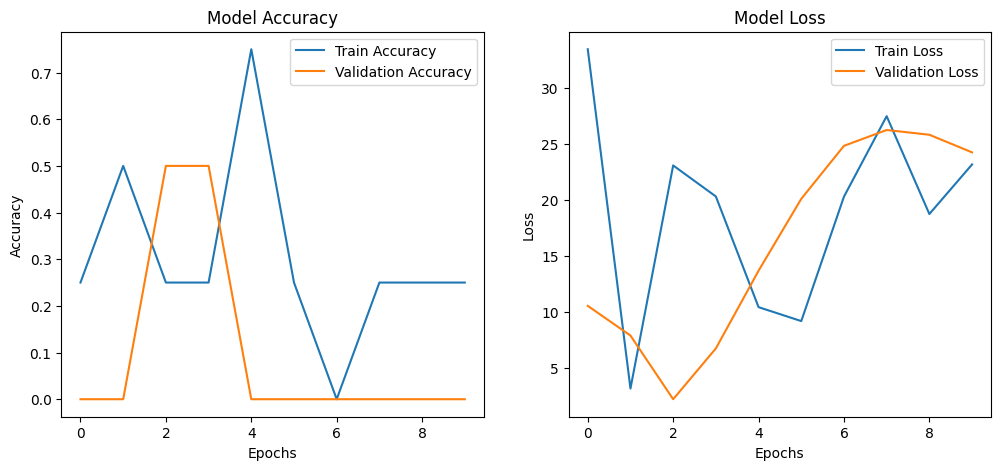


Weighted Averages:
Weighted Precision: 0.89
Weighted Recall: 0.89
Weighted F1-Score: 0.89
Weighted Accuracy: 0.83


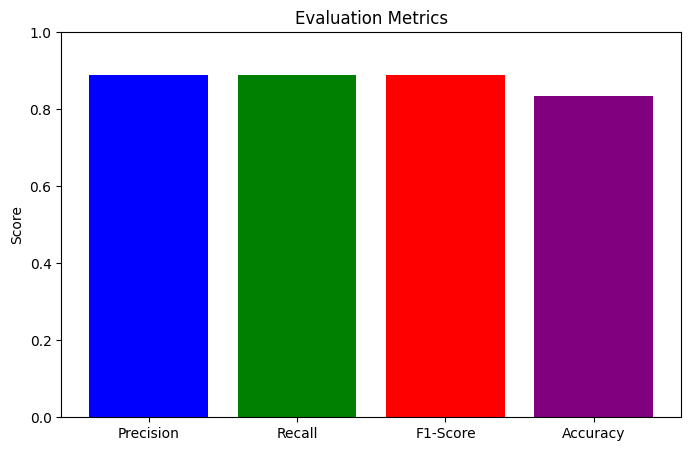

In [ ]:
import librosa
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tensorflow import keras
from tensorflow.keras import layers
import speech_recognition as sr

def extract_features(audio_file):
    try:
        y, sr = librosa.load(audio_file, sr=16000)
        if len(y) == 0:
            print(f"Warning: {audio_file} is silent.")
            return None
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        if mfccs.shape[1] == 0:
            print(f"Warning: No MFCCs extracted from {audio_file}")
            return None
        return np.mean(mfccs.T, axis=0)
    except Exception as e:
        print(f"Error processing {audio_file}: {e}")
        return None

def speech_to_text(audio_file):
    try:
        r = sr.Recognizer()
        with sr.AudioFile(audio_file) as source:
            audio_data = r.record(source)
        text = r.recognize_google(audio_data)
        return text.lower()
    except sr.UnknownValueError:
        print(f"Could not understand audio: {audio_file}")
        return None
    except sr.RequestError as e:
        print(f"Could not request results from Google Speech Recognition service; {e}")
        return None
    except Exception as e:
        print(f"Error in speech_to_text: {e}")
        return None

audio_files_and_labels = [
    ("sounds/Life is a beautiful (alfred-british).wav", "Life is a beautiful journey"),
    ("sounds/Hello Myself Devajit.wav", "hello myself devajit"),
    ("sounds/Hello My self Ryan(canadian -ryan).wav", "hello myself ryan"),
    ("sounds/Hello My self Rishi(indian-rishi).wav", "hello myself rishi"),
    ("sounds/Hello Myself Devajit (irish-cillian).wav", "hello myself Devajit"),
    ("sounds/Life is a beautiful (shirley-scottish).wav", "Life is a beautiful journey"),
]

X, y = [], []
for audio_path, label in audio_files_and_labels:
    if os.path.exists(audio_path):
        features = extract_features(audio_path)
        if features is not None:
            X.append(features)
            y.append(label.lower())
    else:
        print(f"Error: Audio file not found: {audio_path}")

if not X or not y:
    exit("Error: No valid features extracted. Check your audio files.")

X = np.array(X)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_test, y_test))

def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Model Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Model Loss')

    plt.show()

plot_training_history(history)

def evaluate_model(ground_truth, predicted):
    if ground_truth is None or predicted is None:
        return {'precision': 0, 'recall': 0, 'f1_score': 0, 'accuracy': 0}

    ground_truth_words = ground_truth.lower().split()
    predicted_words = predicted.lower().split()

    common_words = set(ground_truth_words) & set(predicted_words)
    precision = len(common_words) / len(predicted_words) if predicted_words else 0
    recall = len(common_words) / len(ground_truth_words) if ground_truth_words else 0
    f1 = 2 * precision * recall / (precision + recall) if precision + recall else 0
    accuracy = len(common_words) / len(set(ground_truth_words) | set(predicted_words)) if (set(ground_truth_words) | set(predicted_words)) else 0

    return {'precision': precision, 'recall': recall, 'f1_score': f1, 'accuracy': accuracy}

total_precision = total_recall = total_f1 = total_accuracy = total_weight = 0

y_true, y_pred = [], []
for audio_path, ground_truth_label in audio_files_and_labels:
    recognized_text = speech_to_text(audio_path)
    if recognized_text is not None:
        metrics = evaluate_model(ground_truth_label, recognized_text)
        weight = 1
        total_precision += metrics['precision'] * weight
        total_recall += metrics['recall'] * weight
        total_f1 += metrics['f1_score'] * weight
        total_accuracy += metrics['accuracy'] * weight
        total_weight += weight

        y_true.append(ground_truth_label)
        y_pred.append(recognized_text)

if total_weight > 0:
    print("\nWeighted Averages:")
    print(f"Weighted Precision: {total_precision / total_weight:.2f}")
    print(f"Weighted Recall: {total_recall / total_weight:.2f}")
    print(f"Weighted F1-Score: {total_f1 / total_weight:.2f}")
    print(f"Weighted Accuracy: {total_accuracy / total_weight:.2f}")

    plt.figure(figsize=(8, 5))
    plt.bar(['Precision', 'Recall', 'F1-Score', 'Accuracy'],
            [total_precision / total_weight, total_recall / total_weight, total_f1 / total_weight, total_accuracy / total_weight],
            color=['blue', 'green', 'red', 'purple'])
    plt.title('Evaluation Metrics')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.show()
else:
    print("No valid predictions to calculate weighted averages.")
